In [1]:
!python --version

Python 3.7.3


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt


In [2]:
# import data
facebook = pd.read_csv('facebook_train.csv')
facebook_test = pd.read_csv('facebook_test.csv')

#split into training and testing -> change fb_y choice
#here if you want to predict something else
dummies_df = pd.get_dummies(facebook[['type']])
facebook = pd.concat([facebook,dummies_df], axis=1)

dummies_df_test = pd.get_dummies(facebook_test[['type']])
facebook_test = pd.concat([facebook_test,dummies_df_test], axis=1)
fb_x_test = facebook_test[['total_followers', 'category', 'month',
				'weekday', 'hour', 'paid', 'type_Link', 'type_Photo', 
				'type_Status']]
fb_y_test = facebook_test[['like']]

fb_x = facebook[['total_followers', 'category', 'month',
				'weekday', 'hour', 'paid', 'type_Link', 'type_Photo', 
				'type_Status']]
fb_y_comment = facebook[['comment']]
fb_y_like = facebook[['like']]
fb_y_share = facebook[['share']]



In [6]:
X_train, X_test, y_train, y_test = train_test_split(fb_x, fb_y_like, test_size=0.33, random_state=42)

#create and fit model
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_test = LR.predict(fb_x_test)

scores = cross_validate(LR, X_train, y_train, cv=5)
print(scores)


{'fit_time': array([0.00729299, 0.00587749, 0.0049963 , 0.00526094, 0.00550723]), 'score_time': array([0.00499082, 0.00356317, 0.00398374, 0.00410938, 0.00334549]), 'test_score': array([-0.04527716,  0.05447014, -0.13672695, -0.09094216,  0.00463478])}


Mean squared error: 364979.98
Mean squared error test: 50053.04
Coefficients: %0.2f [[ 7.99186170e-04  7.18608594e+01  3.26034259e+00 -1.22636354e+01
  -2.69031466e-01  7.73617226e+01 -1.03370818e+02 -8.10692234e+01
  -1.04691948e+02]]


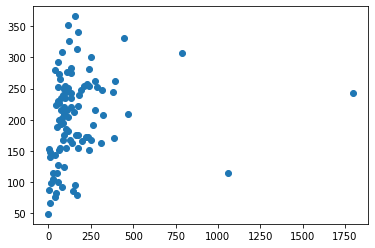

In [7]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean squared error test: %.2f"
      % mean_squared_error(fb_y_test, y_pred_test))
# The coefficients
print('Coefficients: %0.2f', LR.coef_)


plt.scatter(fb_y_test, y_pred_test)
plt.show()